# Project NYC Flighs Analysis 

 Assessment  Business Question by JOI 

In [1]:
# note key functions 

#shift + enter ==> RUN CODE
#ctrl + M ==> convert to markdown cell

https://bookdown.org/asmundhreinn/r4ds-master/diagrams/relational-nycflights.png

# Diagram 
https://bookdown.org/asmundhreinn/r4ds-master/relational-data.html  

In [2]:
# check data 
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   2.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [3]:
flights <- read_csv("flights.csv") 

Rows: 336776 Columns: 19

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): carrier, tailnum, origin, dest
dbl  (14): year, month, day, dep_time, sched_dep_time, dep_delay, arr_time, ...
dttm  (1): time_hour


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
flights <- read.csv("flights.csv")
airlines <- read.csv("airlines.csv")
planes <- read.csv("planes.csv")
weather <- read.csv("weather.csv")

In [5]:
# check data
head(flights)
tail(flights)
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <int> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <int> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01T10:00:00Z
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
336771,2013,9,30,NA,1842,NA,NA,2019,NA,EV,5274,N740EV,LGA,BNA,NA,764,18,42,2013-09-30T22:00:00Z
336772,2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK,DCA,NA,213,14,55,2013-09-30T18:00:00Z
336773,2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA,SYR,NA,198,22,0,2013-10-01T02:00:00Z
336774,2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30T16:00:00Z
336775,2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30T15:00:00Z
336776,2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30T12:00:00Z


In [6]:
apply(flights , MARGIN = 2, function(col) sum(is.na(col)))

year 0 month 0 day 0 dep_time 8255 sched_dep_time 0 dep_delay 8255 arr_time 8713 sched_arr_time 0 arr_delay 9430 carrier 0 flight 0 tailnum 2512 origin 0 dest 0 air_time 9430 distance 0 hour 0 minute 0 time_hour 0

In [7]:

glimpse(flights)
glimpse(airlines)
glimpse(planes)
glimpse(weather)
tibble()

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <int> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <int> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

%lt;0 x 0 matrix%gt;

In [8]:
# head data
head(flights)
head(airlines)
head(planes)
head(weather)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01T10:00:00Z
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


,carrier,name
,<chr>,<chr>
1,9E,Endeavor Air Inc.
2,AA,American Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,DL,Delta Air Lines Inc.
6,EV,ExpressJet Airlines Inc.


,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
2,N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
3,N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
4,N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
5,N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
6,N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01T06:00:00Z
2,EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01T07:00:00Z
3,EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01T08:00:00Z
4,EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01T09:00:00Z
5,EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01T10:00:00Z
6,EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01T11:00:00Z


# Homework Create Business Question 

#  Which top 5 airline had total longest flight distance in March 2013?

In [9]:
flights %>%
  filter(month == 3, year == 2013) %>%
  count(carrier) %>%
  arrange(desc(n)) %>%
  left_join(airlines , "carrier") %>%
  head(5)
  tibble()

,carrier,n,name
,<chr>,<int>,<chr>
1,UA,4971,United Air Lines Inc.
2,B6,4772,JetBlue Airways
3,EV,4726,ExpressJet Airlines Inc.
4,DL,4189,Delta Air Lines Inc.
5,AA,2787,American Airlines Inc.


%lt;0 x 0 matrix%gt;

# What the fastest flights from NYC flights 2013 ?



In [10]:
flights %>%
    group_by(carrier) %>%
    summarise( max_distance = max(distance), 
    min_distance = min(distance), 
    mean_distance = mean(distance),
    sum_distance = sum(distance) ) %>%
    left_join(airlines , "carrier") %>%
    arrange(carrier)
    tibble()

carrier,max_distance,min_distance,mean_distance,sum_distance,name
<chr>,<int>,<int>,<dbl>,<int>,<chr>
9E,1587,94,530.2358,9788152,Endeavor Air Inc.
AA,2586,187,1340.2360,43864584,American Airlines Inc.
AS,2402,2402,2402.0000,1715028,Alaska Airlines Inc.
B6,2586,173,1068.6215,58384137,JetBlue Airways
DL,2586,94,1236.9012,59507317,Delta Air Lines Inc.
EV,1389,80,562.9917,30498951,ExpressJet Airlines Inc.
F9,1620,1620,1620.0000,1109700,Frontier Airlines Inc.
FL,762,397,664.8294,2167344,AirTran Airways Corporation
HA,4983,4983,4983.0000,1704186,Hawaiian Airlines Inc.


%lt;0 x 0 matrix%gt;

# Top 3 route busy on promotion in Newyear by Southwest Airlines 



In [11]:
flights %>%
  select(month, day, carrier, origin, dest) %>%
  filter(month == 1, day == 1, carrier == "WN") %>%
  left_join(airlines , "carrier") %>%
  head(3)
  tibble()

,month,day,carrier,origin,dest,name
,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,1,WN,LGA,BWI,Southwest Airlines Co.
2,1,1,WN,LGA,DEN,Southwest Airlines Co.
3,1,1,WN,EWR,MDW,Southwest Airlines Co.


%lt;0 x 0 matrix%gt;

 #  Find  Max, Min, Average and sum distance for each carrier ?

In [12]:
flights %>%
    group_by(carrier) %>%
    summarise( max_distance = max(distance), 
    min_distance = min(distance), 
    mean_distance = mean(distance),
    sum_distance = sum(distance) ) %>%
    arrange(carrier)
    tibble()

carrier,max_distance,min_distance,mean_distance,sum_distance
<chr>,<int>,<int>,<dbl>,<int>
9E,1587,94,530.2358,9788152
AA,2586,187,1340.2360,43864584
AS,2402,2402,2402.0000,1715028
B6,2586,173,1068.6215,58384137
DL,2586,94,1236.9012,59507317
EV,1389,80,562.9917,30498951
F9,1620,1620,1620.0000,1109700
FL,762,397,664.8294,2167344
HA,4983,4983,4983.0000,1704186


%lt;0 x 0 matrix%gt;

 # In 2013 Which carrier had most delayed flights from top 100  ? 

In [13]:
flights %>%
    filter(year == 2013) %>%
    arrange(desc(arr_delay)) %>%
    head(100) %>%
    count(carrier) %>%
    inner_join(airlines, by = "carrier") %>%
    arrange(desc(n))

carrier,n,name
<chr>,<int>,<chr>
DL,36,Delta Air Lines Inc.
AA,17,American Airlines Inc.
EV,14,ExpressJet Airlines Inc.
MQ,9,Envoy Air
FL,6,AirTran Airways Corporation
UA,4,United Air Lines Inc.
B6,3,JetBlue Airways
VX,3,Virgin America
9E,2,Endeavor Air Inc.


#  How many flight each month in 2013 from High to Low ?

In [36]:
    flights %>%
    group_by(month) %>%
    summarise(total_flight = n()) %>%
    arrange(desc(total_flight)) %>%
    head(12)
    tibble()

month,total_flight
<int>,<int>
7,29425
8,29327
10,28889
3,28834
5,28796
4,28330
6,28243
12,28135
9,27574


%lt;0 x 0 matrix%gt;

# Creat gg plot Relationship between each month and their total air time ?

https://datarockie.com/blog/your-first-ggplot2-visualization/ 

In [58]:
joi_plot <- flights %>% 
group_by(month) %>%
select(month, air_time) %>%
summarize(air_time = n()) %>%
 arrange(desc(air_time))


joi_plot %>% head(12)



month,air_time
<int>,<int>
7,29425
8,29327
10,28889
3,28834
5,28796
4,28330
6,28243
12,28135
9,27574


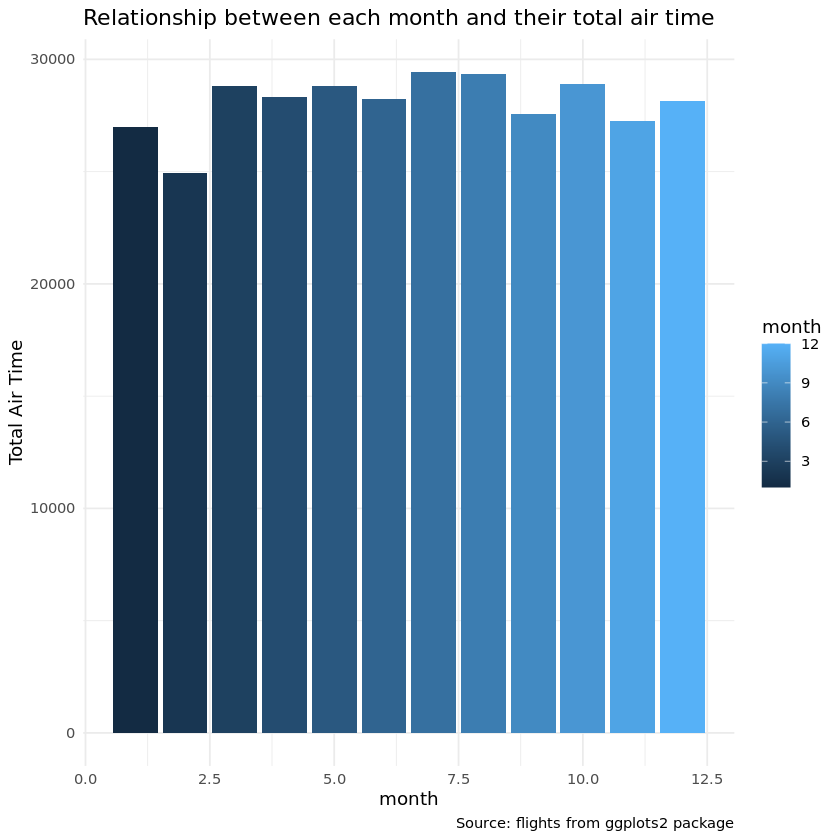

In [59]:
ggplot(joi_plot, aes(fill = month)) + 
    geom_col(aes(month,air_time)) +
    theme_minimal()+
  labs(title = "Relationship between each month and their total air time",
       x ="month", y=" Total Air Time",
       caption = "Source: flights from ggplots2 package")

# How many departure time status on time , delay , cancelled flights in 2013? 

In [33]:
flights %>% 
  select(flight, origin, dest, sched_dep_time, arr_delay) %>%
  mutate(Status_dep = case_when( arr_delay  <= 0   ~  " Flight on time " ,  
                                 arr_delay  >= 0   ~  " Flight Delay   " , 
                                TRUE ~ "Flight cancelled")) %>%
  count ( Status_dep) %>%                              
  rename( Flight_status = n)
  tibble()

Status_dep,Flight_status
<chr>,<int>
Flight Delay,133004
Flight on time,194342
Flight cancelled,9430


%lt;0 x 0 matrix%gt;

# Find carrier that velocity in top 3  ? 
  v = s / t 

  s = dest 
  t = air_time

In [16]:
flights %>%
    select( carrier ,flight, distance, air_time) %>%
    inner_join(airlines, by = "carrier") %>%
    mutate(velocity = distance/air_time) %>%
    arrange(desc(velocity)) %>%
    head(5)
    tibble()

,carrier,flight,distance,air_time,name,velocity
,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,DL,1499,762,65,Delta Air Lines Inc.,11.723077
2,EV,4667,1008,93,ExpressJet Airlines Inc.,10.838710
3,EV,4292,594,55,ExpressJet Airlines Inc.,10.800000
4,EV,3805,748,70,ExpressJet Airlines Inc.,10.685714
5,DL,1902,1035,105,Delta Air Lines Inc.,9.857143


%lt;0 x 0 matrix%gt;

In [17]:
flights %>%
    inner_join(planes, "tailnum") %>%
    count(manufacturer)  %>%
    arrange(desc(n))
    tibble ()

manufacturer,n
<chr>,<int>
BOEING,82912
EMBRAER,66068
AIRBUS,47302
AIRBUS INDUSTRIE,40891
BOMBARDIER INC,28272
MCDONNELL DOUGLAS AIRCRAFT CO,8932
MCDONNELL DOUGLAS,3998
CANADAIR,1594
MCDONNELL DOUGLAS CORPORATION,1259


%lt;0 x 0 matrix%gt;